In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt # to visualize 
import numpy as np 

In [2]:
mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_test.shape

(10000, 28, 28)

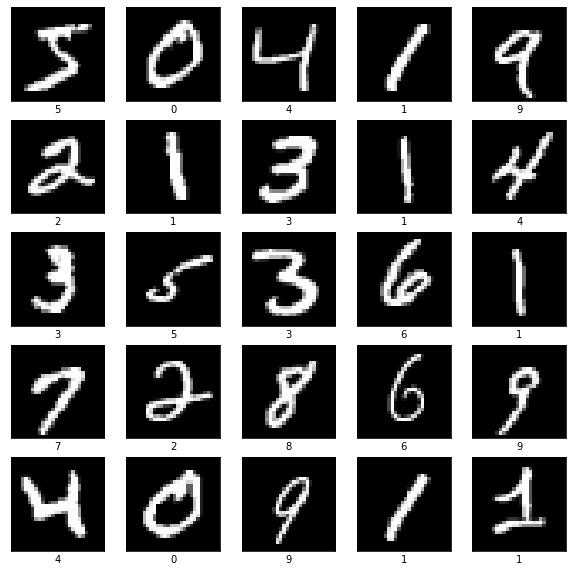

In [8]:
size=25
plt.figure(figsize=(10,10))

for i in range(size):
  plt.subplot(5,5,i+1)
  #imshow
  plt.imshow(x_train[i],cmap='gray') # plt - imshow
  plt.xticks([])
  plt.yticks([])
  #label 
  plt.xlabel(y_train[i])
plt.show()

In [9]:
x_train,x_test=x_train/255.0,x_test/255.0   #divide by max value 

In [10]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # flatten 

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2998 - accuracy: 0.9132 - val_loss: 0.1391 - val_accuracy: 0.9598
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1434 - accuracy: 0.9580 - val_loss: 0.1024 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9671 - val_loss: 0.0835 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9730 - val_loss: 0.0826 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9762 - val_loss: 0.0704 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9795 - val_loss: 0.0667 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0597 - accuracy: 0.9804 - val_loss: 0.0686 - val_accuracy:

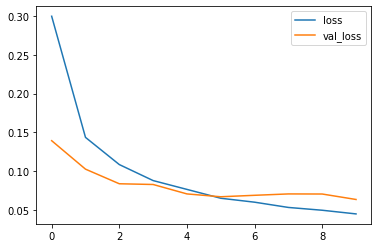

In [12]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

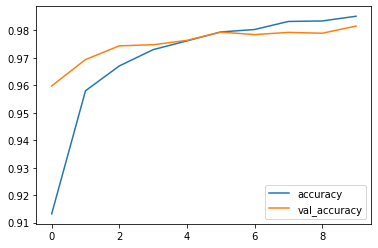

In [13]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [14]:
from sklearn.metrics import confusion_matrix

In [17]:
y_pred=model.predict(x_test).argmax(axis=1)
y_pred.shape

313/313 [==============================] - 0s 1ms/step


(10000,)

In [18]:
y_test.shape

(10000,)

In [19]:
cm=confusion_matrix(y_test,y_pred) #actual , and predicted 

In [20]:
cm

array([[ 968,    1,    3,    1,    0,    0,    4,    1,    2,    0],
       [   0, 1124,    4,    0,    0,    0,    3,    0,    4,    0],
       [   0,    0, 1020,    3,    0,    0,    1,    4,    3,    1],
       [   0,    0,    8,  988,    0,    5,    0,    3,    3,    3],
       [   0,    0,    3,    0,  963,    0,    5,    3,    2,    6],
       [   3,    1,    0,    8,    1,  872,    3,    0,    3,    1],
       [   0,    3,    2,    1,    2,    7,  941,    0,    2,    0],
       [   1,    1,   10,    2,    0,    0,    0, 1010,    1,    3],
       [   1,    0,    5,    8,    2,    2,    0,    5,  950,    1],
       [   1,    5,    0,    4,    6,    3,    0,    7,    3,  980]])

In [21]:
import seaborn as sns

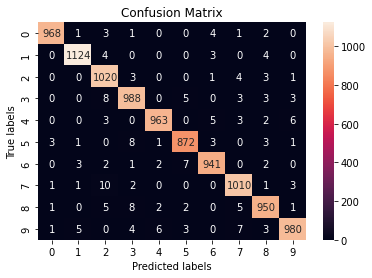

In [22]:

ax= plt.subplot()

sns.heatmap(cm,annot=True,fmt='g',ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

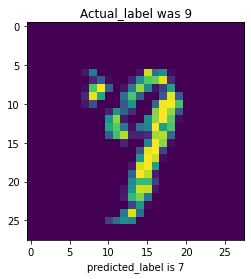

In [24]:
i=np.random.choice(np.where(y_test!=y_pred)[0])


plt.imshow(x_test[i])
plt.title('Actual_label was '+str(y_test[i])) 
plt.xlabel('predicted_label is ' + str(y_pred[i])) 
plt.show();